<h4 style="direction:rtl;" align="center">بسم الله الرحمن الرحیم</h4>
<br>
<h4 style="direction:rtl;" align="center">دانشگاه صنعتی شریف - بهار ۱۴۰۲</h4>
<h3 style="direction:rtl;" align="center">درس سامانه‌های یادگیری ماشین</h3>
<hr>
<div><h2 style="direction:rtl;" align="center">تمرین اول - بخش تحلیل اکتشافی دادگان</h2><div>
<hr>
<h4 style="direction:rtl;" align="center">دانشجو: محمدحسین موثقی‌نیا</h4>
<h4 style="direction:rtl;" align="center">شماره دانشجویی: ۴۰۰۲۰۰۹۱۹</h4>

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.preprocessing import OneHotEncoder
from tqdm import tqdm

In [136]:
df = pd.read_csv("./../data/raw_data.csv")
df = df.drop(df.columns[0], axis=1)
df

,cat1,cat2,cat3,title,description,url,sub_title,price,size,year,room_number,color,mileage,CPU,RAM
0,electronic-devices,computers,laptop-notebook-macbook,لپ تاپ استوک hp,با درود\nلپ تاپ های استوک مارک hp\nhp probook ...,https://divar.ir/v/لپ-تاپ-استوک-hp_رایانه-همرا...,۲ ساعت پیش در شیراز، ملاصدرا,۱۴٬۹۰۰٬۰۰۰,NaN,NaN,NaN,خاکستری,NaN,Core i7,۸
1,electronic-devices,computers,laptop-notebook-macbook,لپتاپ HP PRO نسل ۹ مهندسی,لپ تاپ ، مهندسی، گرافیکی،پر سرعت شیک و ظریف بر...,https://divar.ir/v/لپتاپ-hp-pro-نسل-۹-مهندسی_ر...,۲ ساعت پیش در شیراز، وصال,۱۸٬۸۰۰٬۰۰۰,NaN,NaN,NaN,نقره‌ای,NaN,Ryzen 5,۸
2,electronic-devices,computers,laptop-notebook-macbook,فروش لپتاپ استوک اروپایی,سلام\nتکنو رایان واردکننده لپتاپ استوک اروپایی...,https://divar.ir/v/فروش-لپتاپ-استوک-اروپایی_را...,۳ ساعت پیش در شیراز، زند,۳٬۹۰۰٬۰۰۰,NaN,NaN,NaN,NaN,NaN,NaN,۴
3,electronic-devices,computers,laptop-notebook-macbook,HP ZBOOK15 g3 با گرافیک مجزا مناسب طراحی,❤ بدون واسطه به قیمت عمده خرید کنید ❤\n فروشگا...,https://divar.ir/v/hp-zbook15-g3-با-گرافیک-مجز...,۳ ساعت پیش در شیراز، ملاصدرا,۱۷٬۹۰۰٬۰۰۰,NaN,NaN,NaN,مشکی,NaN,Core i7,۸
4,electronic-devices,computers,laptop-notebook-macbook,لپ تاپ استوک واردات مستقیم از دبی,* با سلام و احترام خدمت شما کاربر گرامی.کمال ت...,https://divar.ir/v/لپ-تاپ-استوک-واردات-مستقیم-...,۳ ساعت پیش در شیراز، پودنک,۱۰٬۰۰۰٬۰۰۰,NaN,NaN,NaN,سایر,NaN,غیره,غیره
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,vehicles,auto,car,پژو پارس پرشیا اتومات فابریک موتور TU5نقد اقساط,سلام و درود خدمت همه عزیزان \n \n ...,https://divar.ir/v/پژو-پارس-پرشیا-اتومات-فابری...,نیم ساعت پیش در تهران، نازی‌آباد,۳۶۰٬۰۰۰٬۰۰۰,NaN,۱۳۸۹,NaN,خاکستری,۱۴۳٬۰۰۰,NaN,NaN
1426,vehicles,auto,car,جیلی GC6 اکسلنت، مدل ۱۳۹۸,خودرو در حد صفر میباشد اتوماتیک دارای گیربکس ژ...,https://divar.ir/v/جیلی-gc6-اکسلنت-مدل-۱۳۹۸_سو...,نیم ساعت پیش در تهران، پونک,۷۴۰٬۰۰۰٬۰۰۰,NaN,۱۳۹۸,NaN,سفید,۶۰٬۰۰۰,NaN,NaN
1427,vehicles,auto,car,ام وی ام ایکس۳۳-AT-نیوفیس جدید,ام وی ام ایکس۳۳-AT-نیوفیس\nبسیار تمیز و بدون خ...,https://divar.ir/v/ام-وی-ام-ایکس۳۳-at-نیوفیس-ج...,نیم ساعت پیش در تهران، ولنجک,۱٬۱۹۰٬۰۰۰٬۰۰۰,NaN,۱۴۰۰,NaN,خاکستری,۵۶٬۰۰۰,NaN,NaN
1428,vehicles,auto,car,پژو 206 تیپ ۲، مدل ۱۳۹۸,فوق العاده سالم و بی رنگ\nیک جفت باند پایونیر\...,https://divar.ir/v/پژو-206-تیپ-۲-مدل-۱۳۹۸_سوار...,نیم ساعت پیش در تهران، دریاچه شهدای خلیج فارس,۴۶۸٬۰۰۰٬۰۰۰,NaN,۱۳۹۸,NaN,سفید,۷۲٬۰۰۰,NaN,NaN


## preprocessing

In [137]:
df['cat1'] = df['cat1'].fillna('Unknown')
df['cat2'] = df['cat2'].fillna('Unknown')
df['cat3'] = df['cat3'].fillna('Unknown')
df["color"] = df['color'].fillna('Unknown')
df["CPU"] = df['CPU'].fillna('Unknown')
drop_index = df[ (df['price'] == "غیرقابل نمایش") | (df['price'] == "شخصی") ].index
df = df.drop(drop_index)

In [138]:
def normalize_numbers(number, out_type="int"):
    norm = {"۱":"1","۲":"2","۳":"3","۴":"4","۵":"5","۶":"6","۷":"7","۸":"8","۹":"9","۰":"0","٬":"",".":"."}
    result = ""
    if number == 'NAN' or number == 'nan' or pd.isna(number) or number == "مطرح نیست":
        return -1
    for n in number:
        if n in norm.keys():
            result += norm[n]
    if out_type == "float":
        return float(result)
    else:
        return int(result)

In [139]:
df['price'] = [normalize_numbers(p) for p in df['price']]
df['size'] = [normalize_numbers(p) for p in df['size']]
df["year"] = [normalize_numbers(p.replace("قبل از ", "") if type(p) == str else p) for p in df["year"]]
df['room_number'] = [normalize_numbers(p.replace("+۴", "۵") if type(p) == str else p) for p in df['room_number']]
df['mileage'] = [normalize_numbers(p) for p in df['mileage']]
df['RAM'] = [normalize_numbers(p if type(p) == str else p, "float") if p != "غیره" else p for p in df['RAM']]

In [140]:
df

,cat1,cat2,cat3,title,description,url,sub_title,price,size,year,room_number,color,mileage,CPU,RAM
0,electronic-devices,computers,laptop-notebook-macbook,لپ تاپ استوک hp,با درود\nلپ تاپ های استوک مارک hp\nhp probook ...,https://divar.ir/v/لپ-تاپ-استوک-hp_رایانه-همرا...,۲ ساعت پیش در شیراز، ملاصدرا,14900000,-1,-1,-1,خاکستری,-1,Core i7,8.0
1,electronic-devices,computers,laptop-notebook-macbook,لپتاپ HP PRO نسل ۹ مهندسی,لپ تاپ ، مهندسی، گرافیکی،پر سرعت شیک و ظریف بر...,https://divar.ir/v/لپتاپ-hp-pro-نسل-۹-مهندسی_ر...,۲ ساعت پیش در شیراز، وصال,18800000,-1,-1,-1,نقره‌ای,-1,Ryzen 5,8.0
2,electronic-devices,computers,laptop-notebook-macbook,فروش لپتاپ استوک اروپایی,سلام\nتکنو رایان واردکننده لپتاپ استوک اروپایی...,https://divar.ir/v/فروش-لپتاپ-استوک-اروپایی_را...,۳ ساعت پیش در شیراز، زند,3900000,-1,-1,-1,Unknown,-1,Unknown,4.0
3,electronic-devices,computers,laptop-notebook-macbook,HP ZBOOK15 g3 با گرافیک مجزا مناسب طراحی,❤ بدون واسطه به قیمت عمده خرید کنید ❤\n فروشگا...,https://divar.ir/v/hp-zbook15-g3-با-گرافیک-مجز...,۳ ساعت پیش در شیراز، ملاصدرا,17900000,-1,-1,-1,مشکی,-1,Core i7,8.0
4,electronic-devices,computers,laptop-notebook-macbook,لپ تاپ استوک واردات مستقیم از دبی,* با سلام و احترام خدمت شما کاربر گرامی.کمال ت...,https://divar.ir/v/لپ-تاپ-استوک-واردات-مستقیم-...,۳ ساعت پیش در شیراز، پودنک,10000000,-1,-1,-1,سایر,-1,غیره,غیره
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,vehicles,auto,car,پژو پارس پرشیا اتومات فابریک موتور TU5نقد اقساط,سلام و درود خدمت همه عزیزان \n \n ...,https://divar.ir/v/پژو-پارس-پرشیا-اتومات-فابری...,نیم ساعت پیش در تهران، نازی‌آباد,360000000,-1,1389,-1,خاکستری,143000,Unknown,-1
1426,vehicles,auto,car,جیلی GC6 اکسلنت، مدل ۱۳۹۸,خودرو در حد صفر میباشد اتوماتیک دارای گیربکس ژ...,https://divar.ir/v/جیلی-gc6-اکسلنت-مدل-۱۳۹۸_سو...,نیم ساعت پیش در تهران، پونک,740000000,-1,1398,-1,سفید,60000,Unknown,-1
1427,vehicles,auto,car,ام وی ام ایکس۳۳-AT-نیوفیس جدید,ام وی ام ایکس۳۳-AT-نیوفیس\nبسیار تمیز و بدون خ...,https://divar.ir/v/ام-وی-ام-ایکس۳۳-at-نیوفیس-ج...,نیم ساعت پیش در تهران، ولنجک,1190000000,-1,1400,-1,خاکستری,56000,Unknown,-1
1428,vehicles,auto,car,پژو 206 تیپ ۲، مدل ۱۳۹۸,فوق العاده سالم و بی رنگ\nیک جفت باند پایونیر\...,https://divar.ir/v/پژو-206-تیپ-۲-مدل-۱۳۹۸_سوار...,نیم ساعت پیش در تهران، دریاچه شهدای خلیج فارس,468000000,-1,1398,-1,سفید,72000,Unknown,-1


In [144]:
cat = {1:{}, 2:{}, 3:{}}
cat[1] = {f"{c}":0 for c in np.unique(list(df["cat1"]))}
cat[2] = {f"{c}":0 for c in np.unique(list(df["cat2"]))}
cat[3] = {f"{c}":0 for c in np.unique(list(df["cat3"]))}
cat_label = ["cat1", "cat2", "cat3"]

In [145]:
for i in tqdm(range(len(df["cat1"]))):
    for idx, l in enumerate(cat_label):
        cat[idx+1][df.iloc[i][l]] += 1

100%|█████████████████████████████████████████████████████████████████████████████| 1428/1428 [00:00<00:00, 7569.18it/s]


In [146]:
def plot_bar(size, cat, title):
    plt.figure(figsize=size)
    plt.title(title)
    plt.bar(range(len(cat)), list(cat.values()), align='center')
    plt.xticks(range(len(cat)), list(cat.keys()), rotation='vertical')
    plt.show()

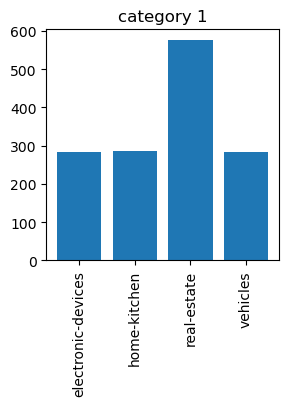

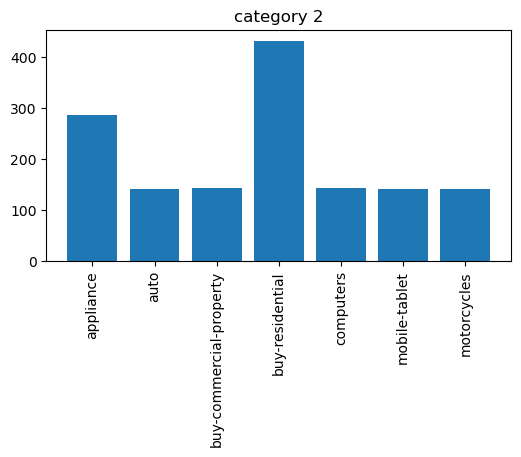

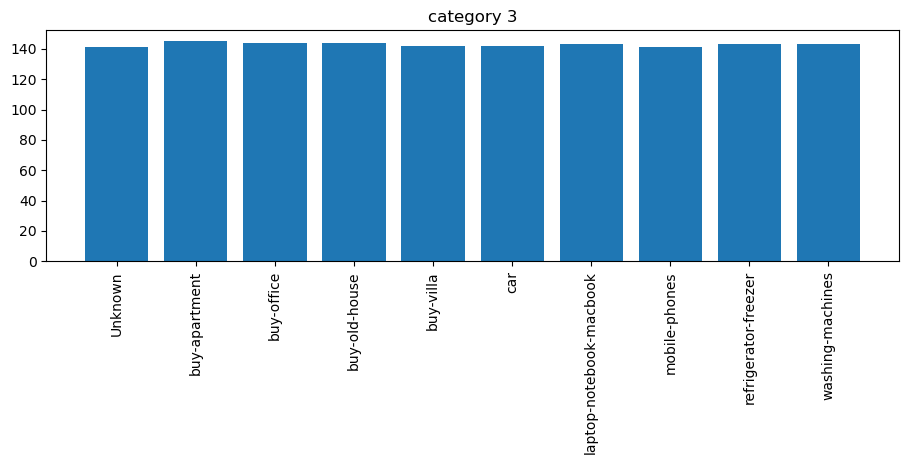

In [147]:
plot_bar((3,3), cat[1], "category 1")
plot_bar((6,3), cat[2], "category 2")
plot_bar((11,3), cat[3], "category 3")

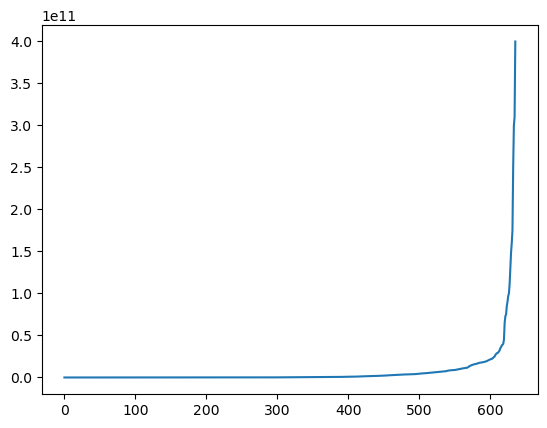

In [149]:
plt.plot(np.unique(df["price"]))
plt.show()

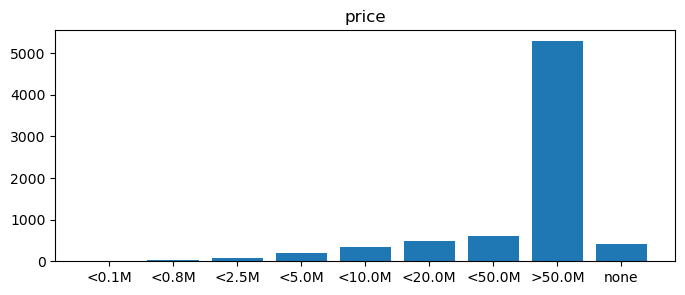

[('<0.1M', 8),
 ('<0.8M', 30),
 ('<2.5M', 88),
 ('<5.0M', 197),
 ('<10.0M', 332),
 ('<20.0M', 484),
 ('<50.0M', 615),
 ('>50.0M', 5285),
 ('none', 406)]

In [150]:
price = [0,0,0,0,0,0,0,0,0]
price_interval = [100_000, 800_000, 2_500_000, 5_000_000, 10_000_000, 20_000_000, 50_000_000]
for p in df["price"]:
    for i, interval in enumerate(price_interval):
        if p <= interval:
            if p == -1:
                price[-1] += 1
            else:
                price[i] += 1
        if p > price_interval[-1]:
            price[-2] += 1

plt.figure(figsize=(8,3))
p_price_interval = [f"<{c/1_000_000}M" for c in price_interval]
p_price_interval.append(f'>{price_interval[-1]/1_000_000}M')
p_price_interval.append('none')
plt.title("price")
plt.bar(range(len(p_price_interval)), price, align='center')
plt.xticks(range(len(p_price_interval)), p_price_interval)
plt.show()

list(zip(p_price_interval, price))

In [151]:
million = 1_000_000
price_list = df[df["price"] != -1]["price"]
print(f"MAX:\t {np.max(price_list)/million:.4f} M")
print(f"MIN:\t {np.min(price_list)/million:.6f} M")
print(f"MEAN:\t {np.mean(price_list)/million:.6f} M")
print(f"MEDIAN:\t {np.median(price_list)/million:.6f} M")
print(f"STD:\t {np.std(price_list)/million:.5f} M")

MAX:	 400000.0000 M
MIN:	 0.001000 M
MEAN:	 4558.786931 M
MEDIAN:	 89.500000 M
STD:	 22528.19564 M


In [152]:
desc = df['description']
desc_stat = {"len":[], "words":[]}
for d in desc:
    desc_stat["len"].append(len(d))
    desc_stat["words"].append(len(d.split()))

In [153]:
def print_stat(title, stat):
    print(f"{title}:")
    print(f"Num:\t {len(stat)}")
    print(f"MAX:\t {np.max(stat)}")
    print(f"MIN:\t {np.min(stat)}")
    print(f"MEAN:\t {np.mean(stat):.2f}")
    print(f"MEDIAN:\t {np.median(stat):.2f}")
    print(f"STD:\t {np.std(stat):.2f}")

In [154]:
print_stat("Length of description", desc_stat['len'])
print("="*10)
print_stat("Words of description", desc_stat['words'])

Length of description:
Num:	 1428
MAX:	 1000
MIN:	 10
MEAN:	 289.00
MEDIAN:	 215.00
STD:	 233.83
Words of description:
Num:	 1428
MAX:	 207
MIN:	 2
MEAN:	 53.23
MEDIAN:	 40.00
STD:	 42.67


In [155]:
def plot_hist_desc(size, stat, title, labels, thr=11_000):
    plt.figure(figsize=size)
    plt.title(title)
    plt.hist(stat, bins=100, label=labels[0])
    plt.plot([np.mean(stat)]*thr, range(0,thr), label=labels[1])
    plt.plot([np.median(stat)]*thr, range(0,thr), label=labels[2])
    plt.legend()
    plt.show()

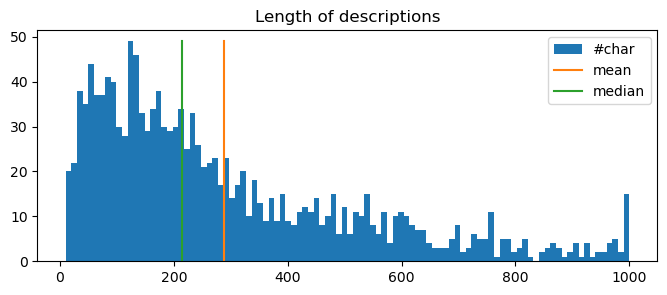

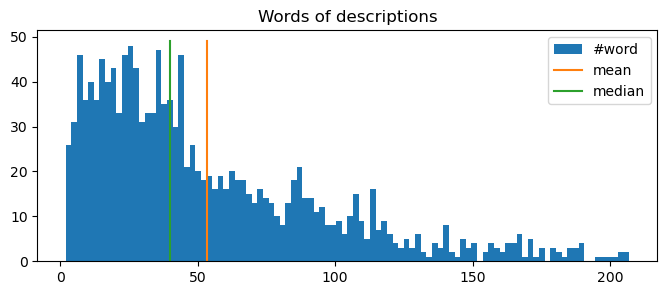

In [161]:
plot_hist_desc((8,3), desc_stat["len"], "Length of descriptions", ["#char", "mean", "median"], thr=50)
plot_hist_desc((8,3), desc_stat["words"], "Words of descriptions", ["#word", "mean", "median"], thr=50)

In [162]:
print_stat("Length of description", [c for c in desc_stat["len"] if c > 20])
print("="*10)
print_stat("Words of description", [c for c in desc_stat["words"] if c > 10])

Length of description:
Num:	 1408
MAX:	 1000
MIN:	 21
MEAN:	 292.88
MEDIAN:	 217.50
STD:	 233.19
Words of description:
Num:	 1289
MAX:	 207
MIN:	 11
MEAN:	 58.24
MEDIAN:	 44.00
STD:	 41.94


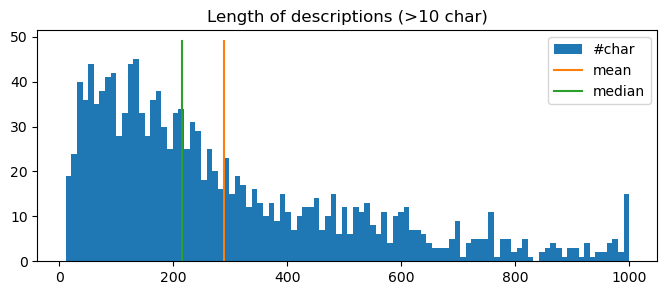

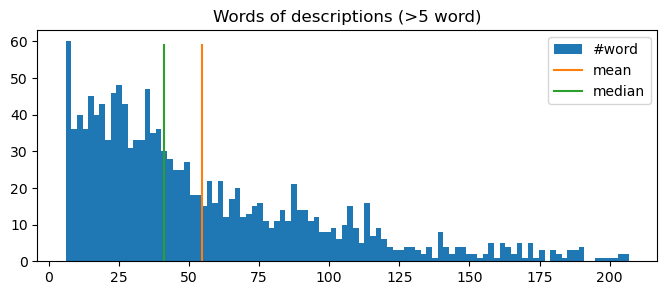

In [165]:
plot_hist_desc((8,3), 
               [c for c in desc_stat["len"] if c > 10], 
               "Length of descriptions (>10 char)", ["#char", "mean", "median"], 
               thr=50)
plot_hist_desc((8,3), 
               [c for c in desc_stat["words"] if c > 5], 
               "Words of descriptions (>5 word)", ["#word", "mean", "median"], 
               thr=60)

## Other

In [32]:
y_data = df[["cat1", "cat2", "cat3"]]
x_data = df[["brand", "city", "desc", "mileage", "price", "title", "type", "year"]]

In [29]:
pd.get_dummies(df["cat3"]).columns

Index(['accessories', 'antiques-and-art', 'ball-sports',
       'barbershop-and-beautysalon', 'bathroom-wc-sauna', 'beds-bedroom',
       'birds', 'cafe-and-restaurant', 'camera-camcoders', 'camping-outdoor',
       'carpets', 'child-car-seat', 'childrens-furniture', 'clothing',
       'coin-stamp', 'cookware-tableware', 'desktops', 'educational',
       'farm-animals', 'fridge-and-freezer', 'garden-and-patio', 'heavy',
       'historical-objects', 'industrial', 'instrument-cleaning-tailoring',
       'jewelry', 'kitchen', 'laptops', 'light', 'lighting', 'microwave-stove',
       'mobile-phones', 'mobile-tablet-accessories',
       'modem-and-network-equipment', 'offices', 'parts-and-accessories',
       'personal-toys', 'piano-keyboard', 'printer-scaner-copier',
       'repair-tool', 'rodents-rabbits', 'shoes-belt-bag', 'shop-and-cash',
       'sofa-armchair', 'stereo-surround', 'storage', 'stove-and-heating',
       'strollers-and-accessories', 'tables-and-chairs', 'tablet',
       '

In [25]:
d = pd.get_dummies(df["cat1"]).to_numpy()
d[0]

array([0, 0, 0, 0, 0, 1], dtype=uint8)

In [33]:
enc = OneHotEncoder()

In [34]:
res = enc.fit_transform(y_data).toarray()

/Users/m213/Library/anaconda3/envs/my-conda-env/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [36]:
res[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [62]:
enc.inverse_transform([res[995]])

array([['personal', 'health-beauty', nan]], dtype=object)